In [148]:
import pandas
import numpy

import matplotlib.pyplot as plt
import seaborn
import plotly.express as px
import plotly.graph_objects as go


In [4]:
directory = '/media/carlos/ea8ff4ea-c5fd-4b9d-bf66-15507c1d2037/Documentos/Banco_de_dados/Codes/04_HousePrices/train.csv'

In [6]:
dataSet = pandas.read_csv(directory)

In [7]:
dataSet.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
def nanValues(dataSet,missingValuesColumnsCount):
    totalCels = numpy.product(dataSet.shape)
    totalMissing = missingValuesColumnsCount.sum()
    percentValuesMissing = (totalMissing/totalCels)*100
    print(percentValuesMissing)

missingValuesColumnsCount = dataSet.isnull().sum()
nanValues(dataSet,missingValuesColumnsCount)

5.889565364451209


In [11]:
missingValuesColumnsCount[0:10]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [48]:
dataSetColumns = dataSet.describe().columns

<AxesSubplot:>

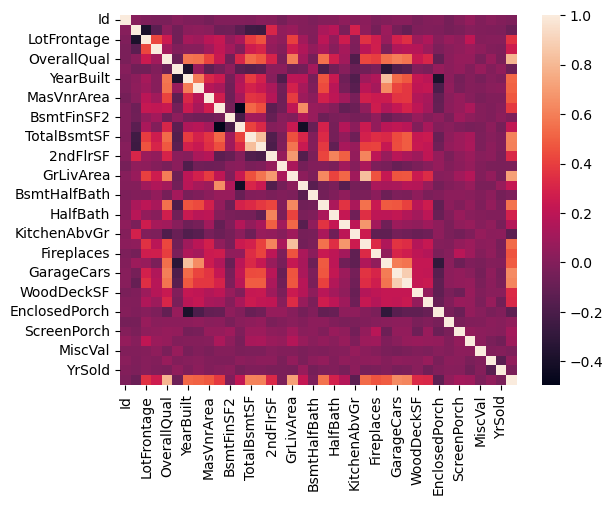

In [27]:
seaborn.heatmap(dataSet.corr())

In [29]:
dataSet.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [53]:
dataSet.columns[0]

'Id'

In [74]:
var1 = ['1','2','3']
var2 = []
var1[2] not in var2

True

In [79]:
def percentColumnNullValues(dataSet, columns):
    nanColumns = []
    for column in columns:
        if (dataSet[column].isnull().sum() / dataSet[column].shape[0] )*100 > 0:
            print(column)
            print((dataSet[column].isnull().sum() / dataSet[column].shape[0] )*100)
            if column not in nanColumns:
                nanColumns.append(column)
    return nanColumns
nanColumns = percentColumnNullValues(dataSet, dataSetColumns)

LotFrontage
17.73972602739726
MasVnrArea
0.547945205479452
GarageYrBlt
5.5479452054794525


In [80]:
print(nanColumns)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [81]:
# A graph in nans columns
for i in range(len(nanColumns)):
    fig = px.histogram(dataSet, x = nanColumns[i])
    fig.show()

In [177]:
# Heatmap using px for Pclass and Survived
fig = px.density_heatmap(dataSet, x = "LotFrontage", y = "YearBuilt")
fig.show()


In [178]:
type(dataSet)

pandas.core.frame.DataFrame

In [265]:
def housesSplitedBy20Years(amountHousesPerYear):
    quantity = []
    year = 1900
    for year in range(1900,2021,20):
        amount=(dataSet.YearBuilt < year).sum()
        quantity.append((year,amount))
    return quantity

amountHousesPerYear = dataSet.YearBuilt
yearAmount = housesSplitedBy20Years(amountHousesPerYear)

In [266]:
type(yearAmount)

list

In [267]:
yearAmount = pandas.DataFrame(numpy.array(yearAmount).reshape(7,2))
print(yearAmount)

      0     1
0  1900    15
1  1920    88
2  1940   239
3  1960   485
4  1980   848
5  2000  1072
6  2020  1460


In [268]:
fig = go.Figure([go.Bar(x=yearAmount[0], y = yearAmount[1].values)])
fig.show()

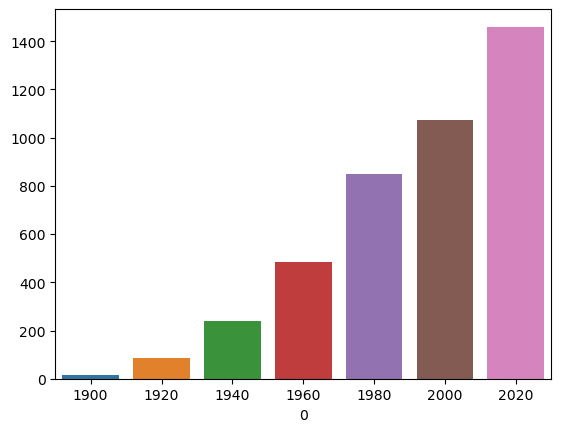

In [269]:
seaborn.barplot(data=n, x=yearAmount[0], y=yearAmount[1].values);